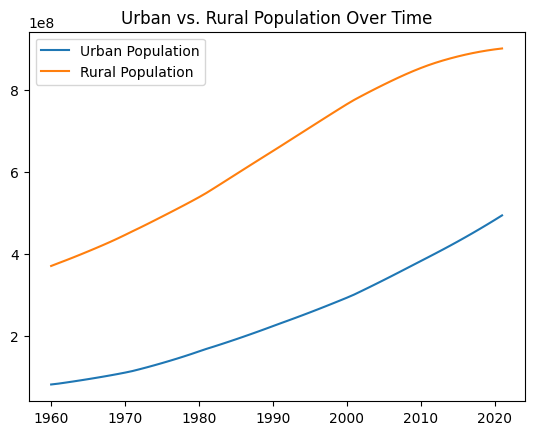

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

luc = pd.read_csv('data/luc_new.csv')
luc = luc.sort_values(by='Year').reset_index(drop=True)
population = pd.read_csv('data/population.csv')
usage = pd.read_csv('data/usage.csv')

urban_pop = population['Urban Population']
rural_pop = population['Rural Population']
year = population['Year']

plt.plot(year, urban_pop, label='Urban Population')
plt.plot(year, rural_pop, label='Rural Population')

plt.title("Urban vs. Rural Population Over Time")
plt.legend()
plt.show()

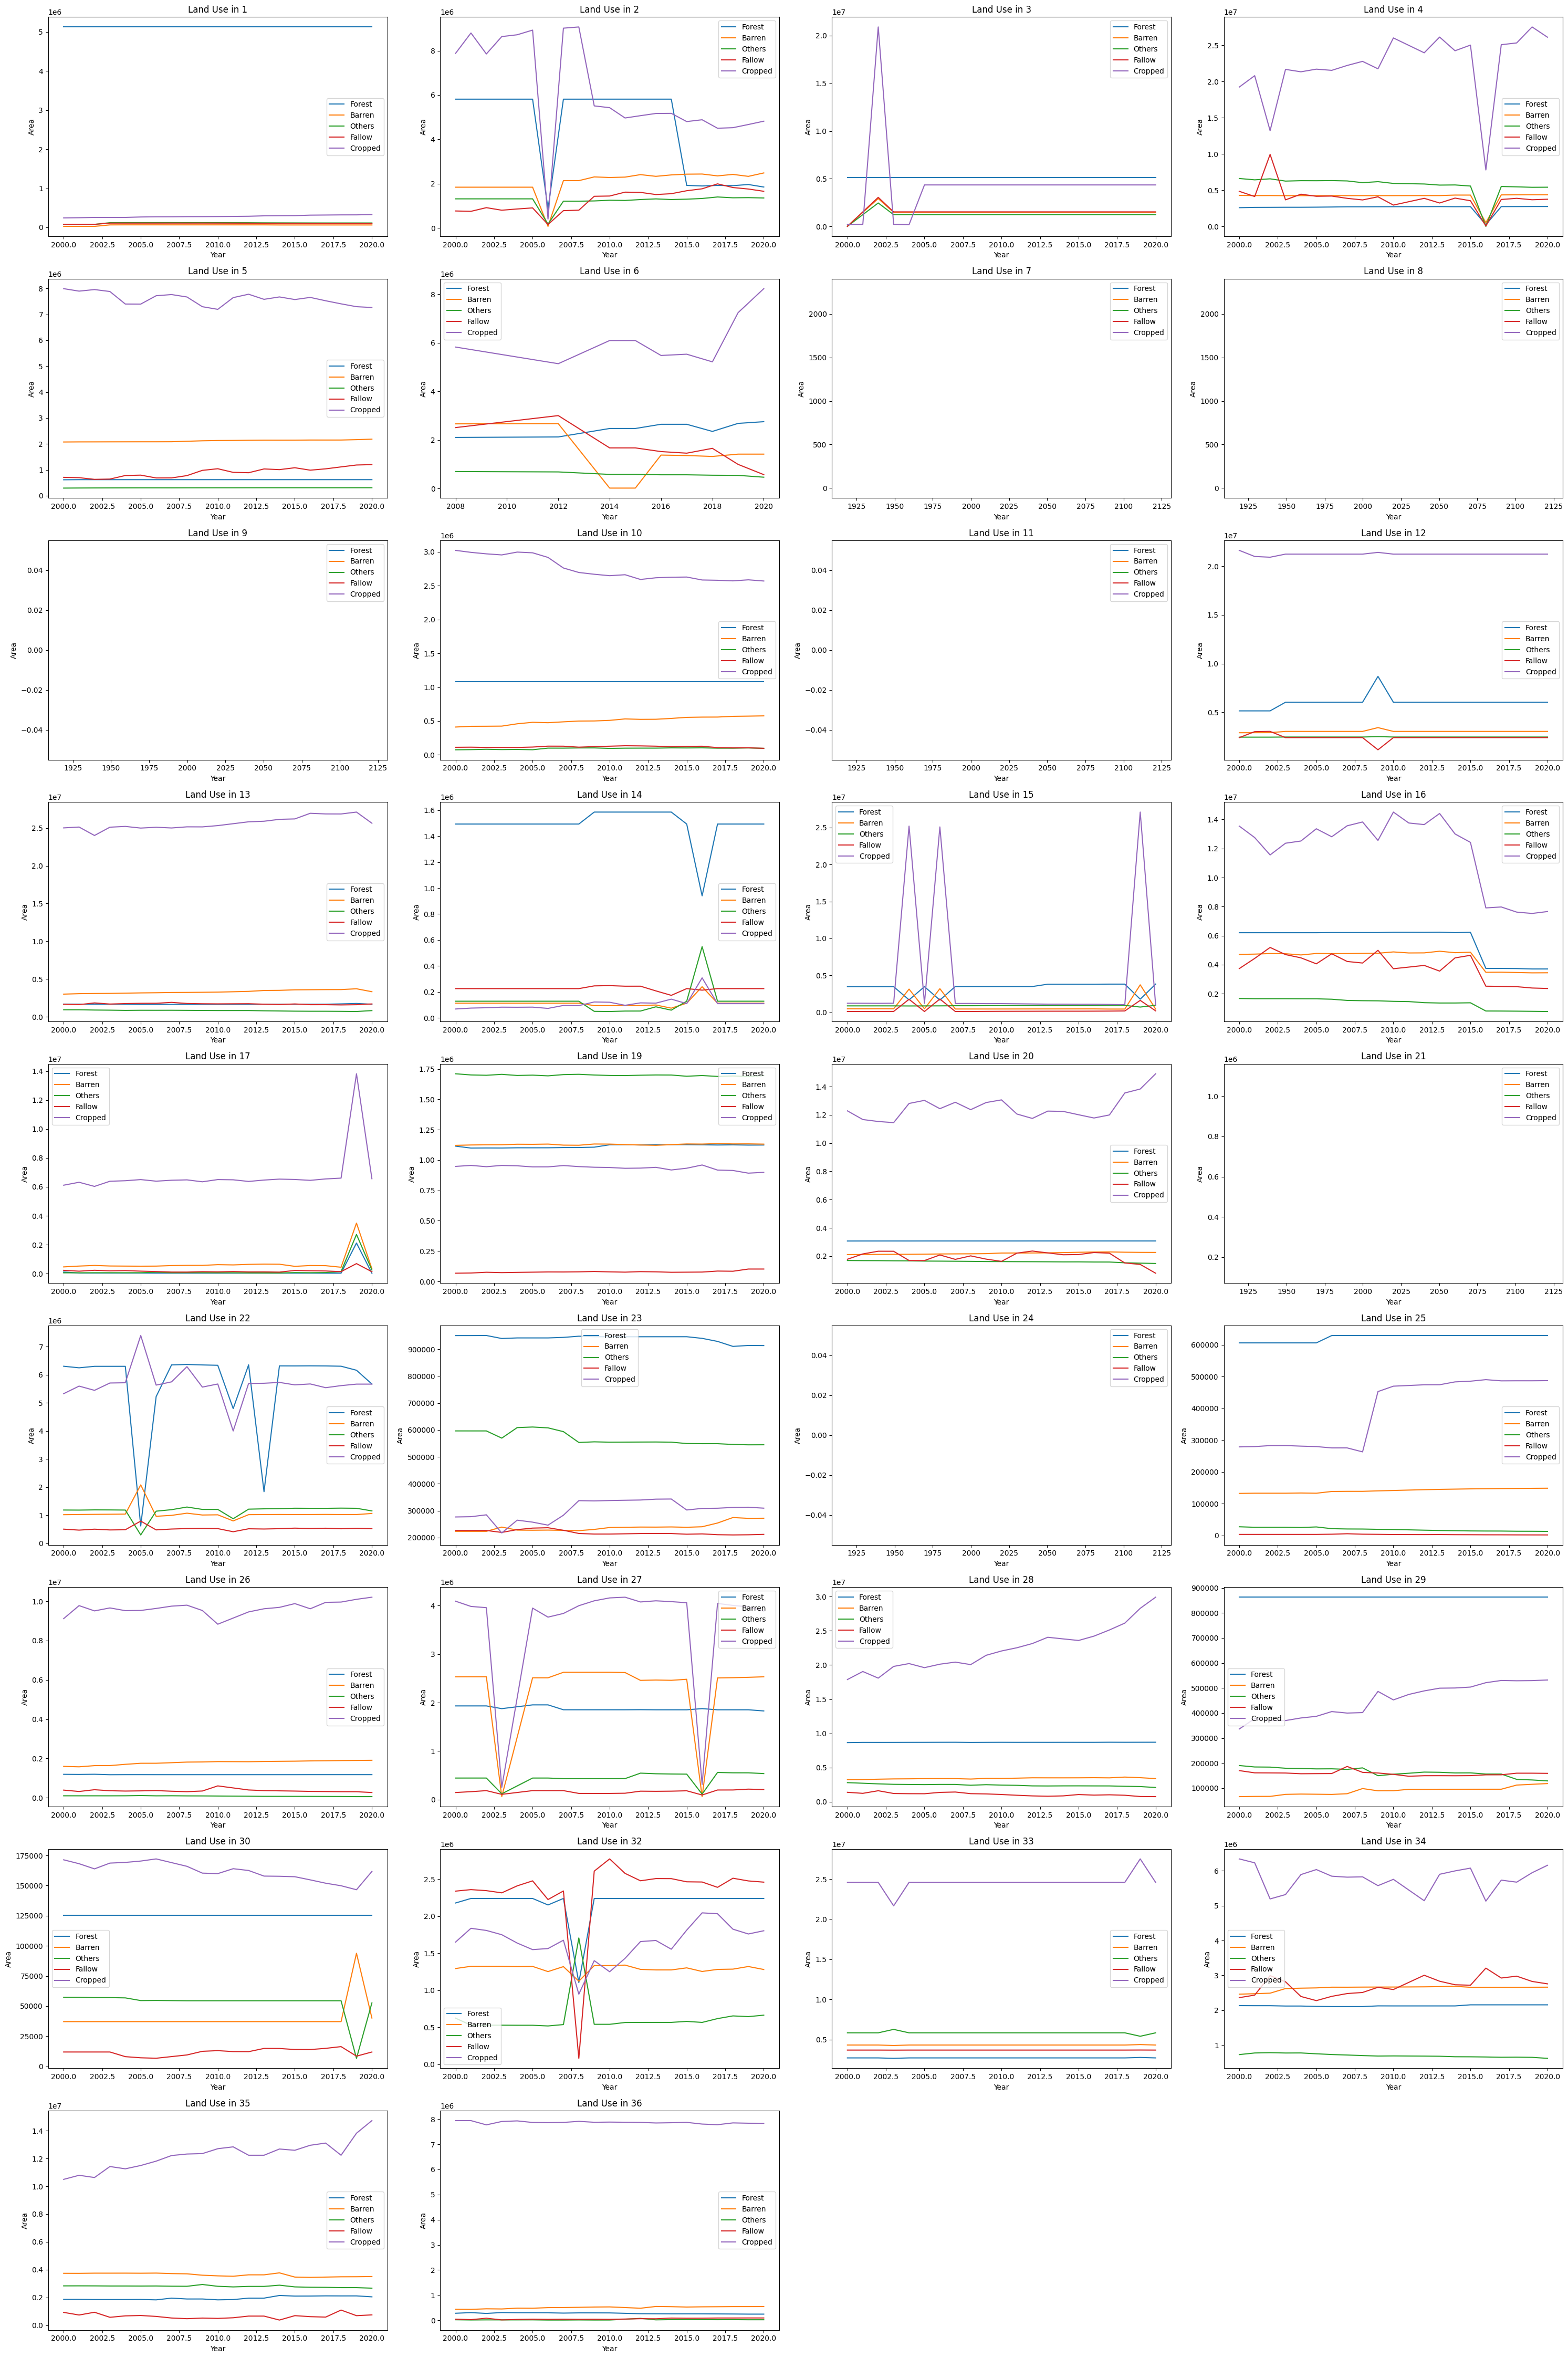

In [22]:
unique_states = list(set(luc['State']))
num_states = len(unique_states)

num_cols = 4
num_rows = (num_states + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 5 * num_rows))
axs = axs.flatten()

for i, state in enumerate(unique_states):
    luc_s = luc[luc['State'] == state]
    forest = luc_s['Forest']
    barren = luc_s['Barren']
    others = luc_s['Others']
    fallow = luc_s['Fallow']
    cropped = luc_s['Cropped']
    year = luc_s['Year']
    
    axs[i].plot(year, forest, label='Forest')
    axs[i].plot(year, barren, label='Barren')
    axs[i].plot(year, others, label='Others')
    axs[i].plot(year, fallow, label='Fallow')
    axs[i].plot(year, cropped, label='Cropped')
    
    axs[i].set_title(f"Land Use in {state}")
    axs[i].legend()
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Area")

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.savefig('data/luc.jpg')

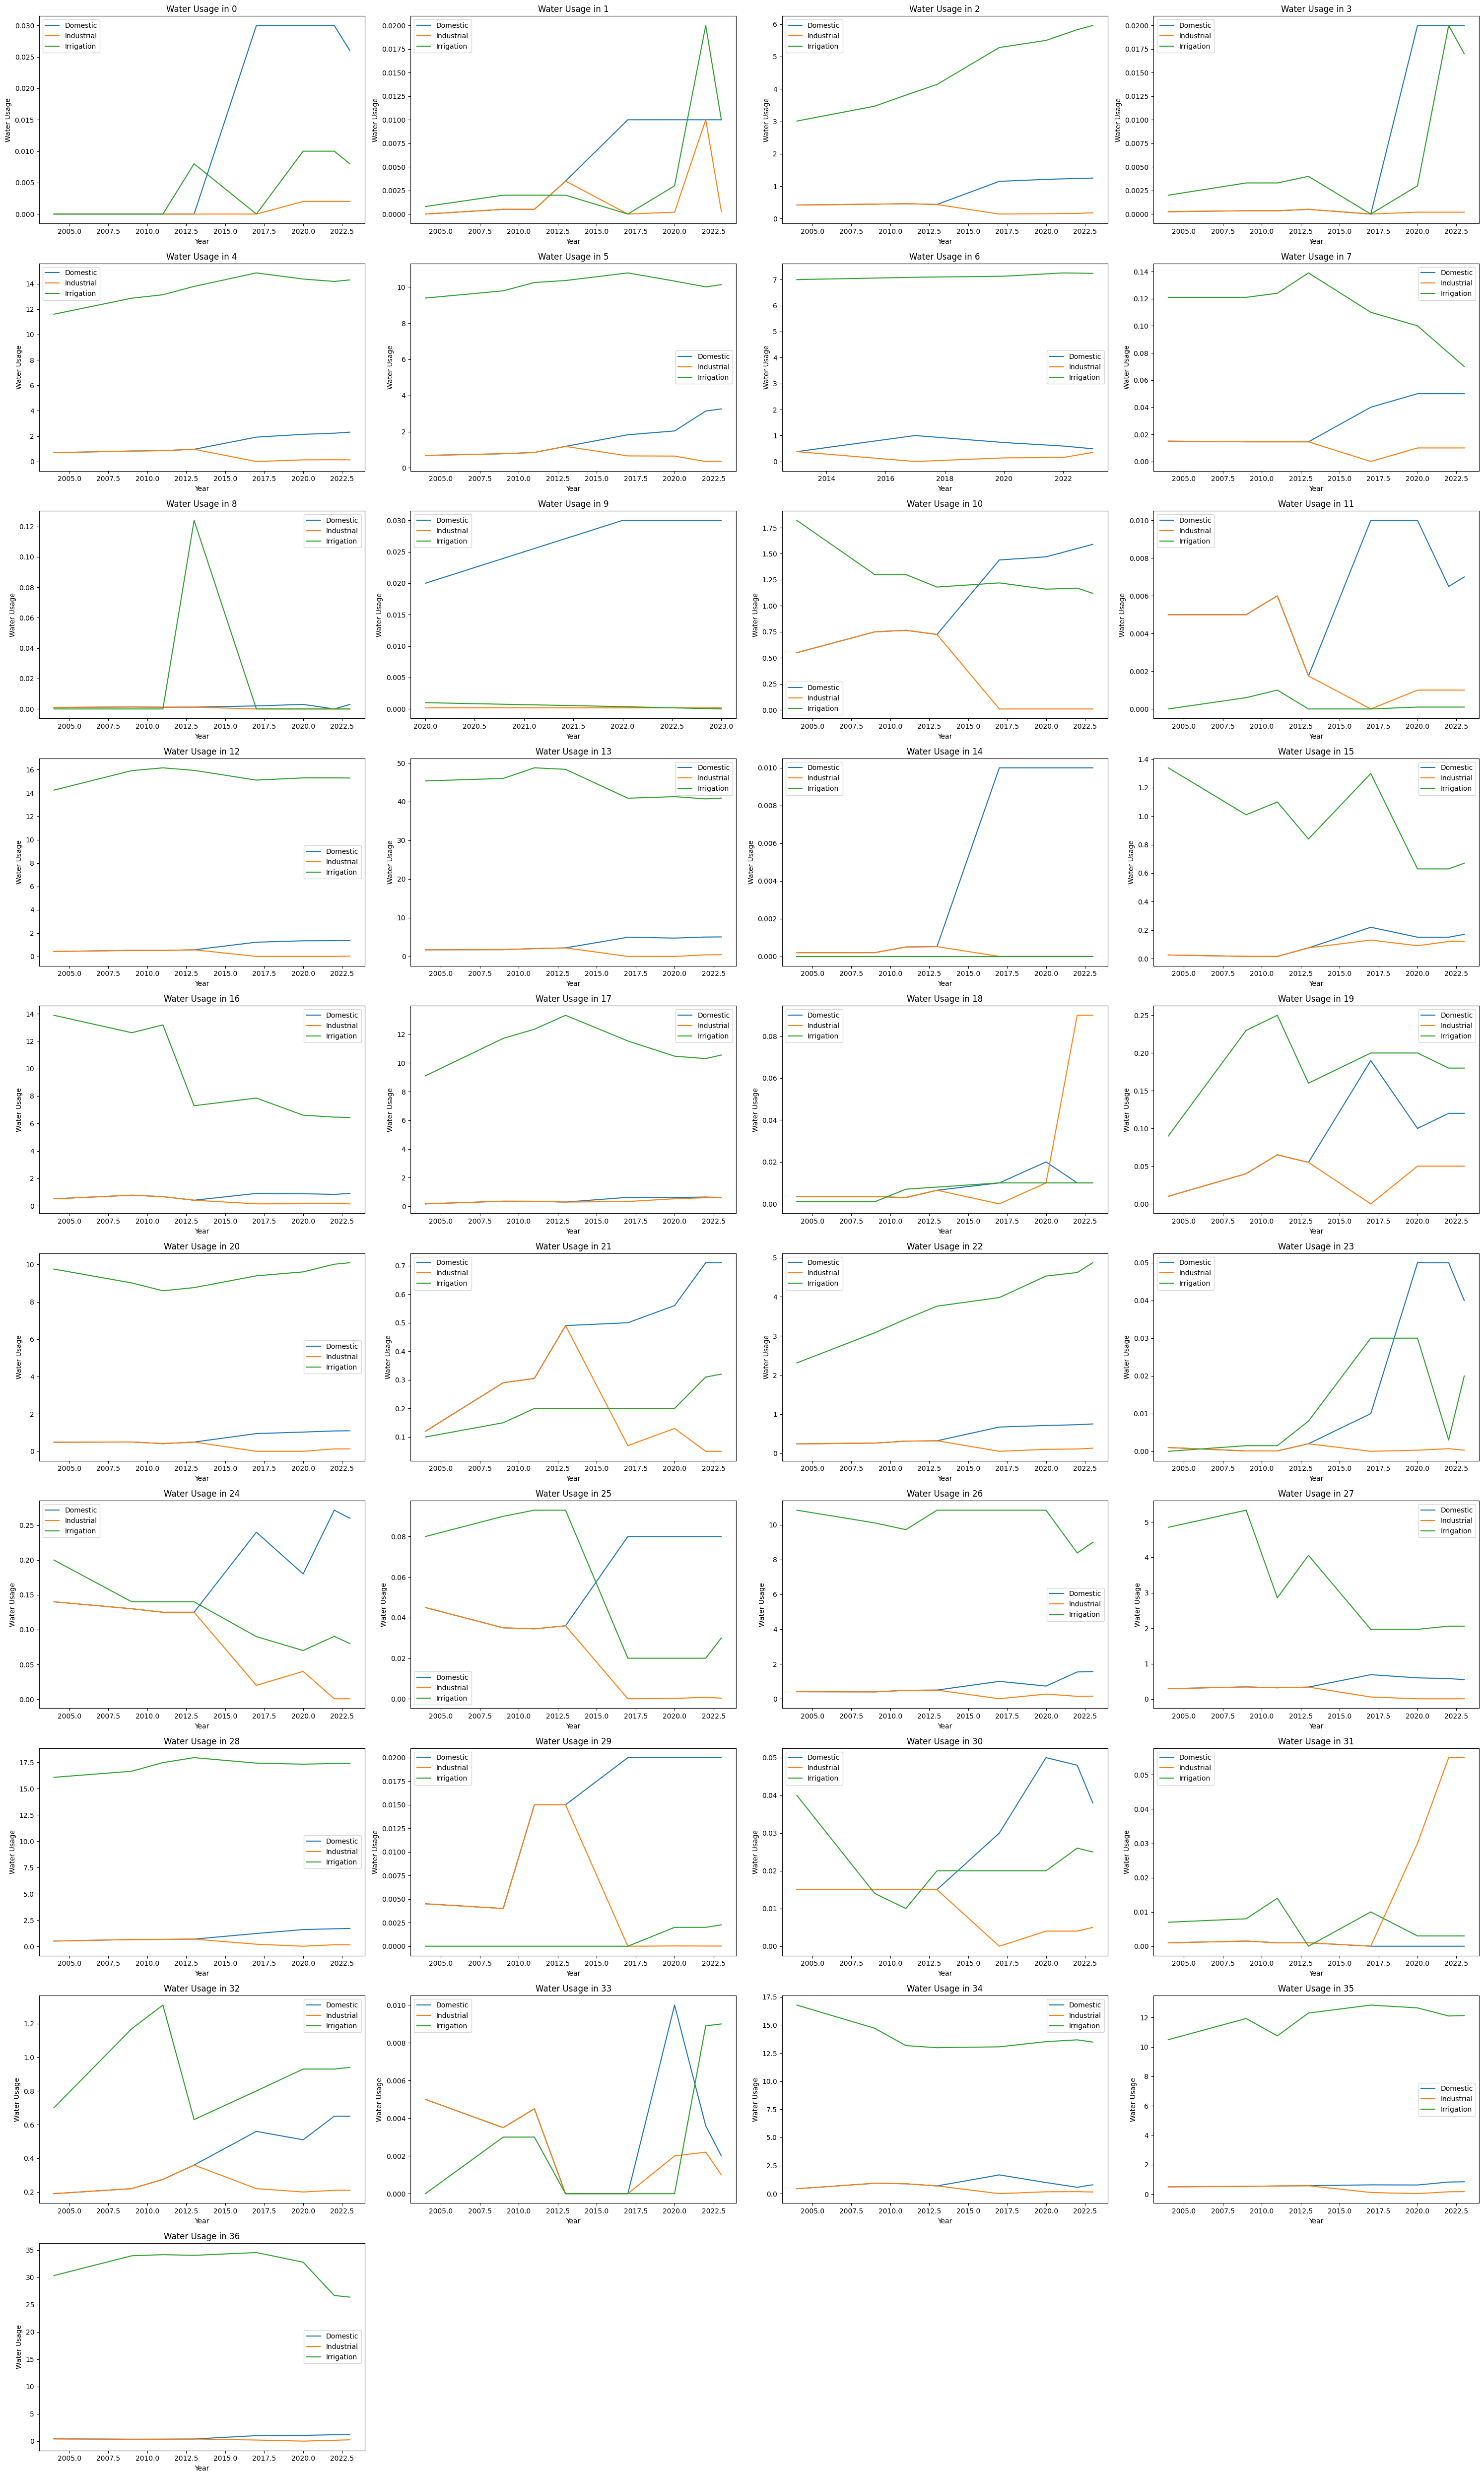

In [16]:
unique_states = list(set(usage['State']))
num_states = len(unique_states)

num_cols = 4
num_rows = (num_states + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 5 * num_rows))
axs = axs.flatten()

for i, state in enumerate(unique_states):
    usage_s = usage[usage['State'] == state]
    years = usage_s['Year']
    domestic = usage_s['Domestic']
    industrial = usage_s['Industrial']
    irrigation = usage_s['Irrigation']
    
    axs[i].plot(years, domestic, label='Domestic')
    axs[i].plot(years, industrial, label='Industrial')
    axs[i].plot(years, irrigation, label='Irrigation')
    
    axs[i].set_title(f"Water Usage in {state}")
    axs[i].legend()
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Water Usage")

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.savefig('data/usage.jpg')
plt.show()